In [131]:
#Import the libraries
import pandas as pd
import scipy.stats as stat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def lg(var):
    try:
    #read the file
        data = pd.read_csv(var) 
        data.dropna(inplace = True)
        gene = data['gene']
        data = data._get_numeric_data() #select numeric data
        cpm = [] #create an empty list to store cpm values
        colo = [] #create an empty list to store
        for col in data.columns:
            colo.append(col)
        #get the cpm values
        for i in range(0,len(data.columns)):
            tot = data.iloc[:,i].sum()
            count = (data.iloc[:,i]/tot)*(10**6)
            cpm.append(count)
        cpm = np.array(cpm)
        log = np.log2(cpm+1) #Get the log values
        zsc = stat.zscore(log) #Find the zscore
        zz = pd.DataFrame(zsc).T #Convert the array into the Dataframe
        zz = zz.fillna(0) #Fill nan values with 0
        zp = zz.values #Convert the DataFrame to array
        sns.set(rc={'figure.figsize':(11.7,8.27)}) #Set the fig size
        #Plot the Heatmap
        sns.heatmap(zp[0:10],xticklabels = colo[0:14],yticklabels = gene[0:10],cmap = 'gnuplot')
        #Save it as a PDF file
        plt.savefig('Heatmap.pdf')
    except:
        print("Enter a csv file")



    #z=stat.zscore(log)
    #z


    

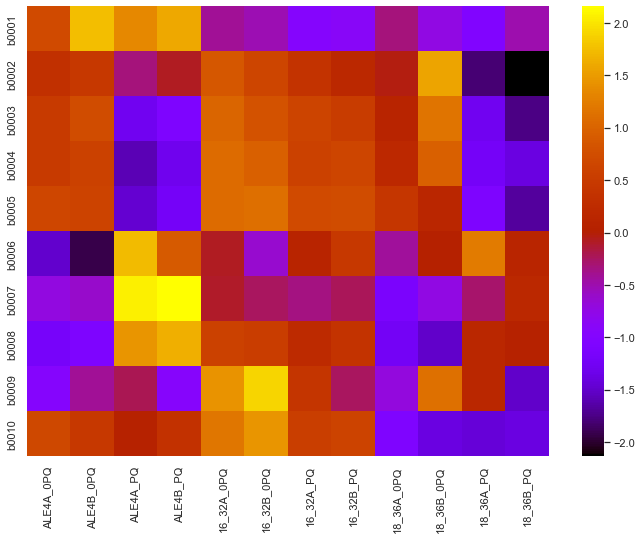

In [132]:
lg('GSE134256_20190523_rnaseq_tpm.csv.gz')  